In [19]:
import json
from typing import Dict, List
from json import JSONEncoder
#import jsonpickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [20]:
day_0_data = pd.read_csv("Data/round-1-island-data-bottle/prices_round_1_day_0.csv", delimiter = ";")
day_0_nn_data = pd.read_csv("Data/round-1-island-data-bottle/trades_round_1_day_0_nn.csv", delimiter = ";")

In [21]:
day_0_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
2,0,100,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [22]:
day_0_nn_data

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,NaN,NaN,STARFRUIT,SEASHELLS,5041.0,4
1,100,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
2,300,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,2
3,300,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1
4,300,NaN,NaN,STARFRUIT,SEASHELLS,5037.0,6
...,...,...,...,...,...,...,...
5312,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1
5313,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
5314,999500,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2
5315,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2


In [23]:
day_1_data = pd.read_csv("Data/round-1-island-data-bottle/prices_round_1_day_-1.csv", delimiter = ";")
day_1_nn_data = pd.read_csv("Data/round-1-island-data-bottle/trades_round_1_day_-1_nn.csv", delimiter = ";")

In [24]:
day_1_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
2,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
3,-1,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1,999700,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,0.0
19996,-1,999800,STARFRUIT,5036,20,NaN,NaN,NaN,NaN,5043,20,NaN,NaN,NaN,NaN,5039.5,0.0
19997,-1,999800,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10002,10,10005.0,20.0,NaN,NaN,9998.5,0.0
19998,-1,999900,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0


In [25]:
#create a dataframe where the product is amethysts and starfruit and display all the data

#starfruit_day_0 = day_0_data[day_0_data["product"] == "STARFRUIT"]

In [31]:
day_1_nn_data

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,STARFRUIT,SEASHELLS,5047.0,13
1,0,NaN,NaN,STARFRUIT,SEASHELLS,5047.0,1
2,0,NaN,NaN,AMETHYSTS,SEASHELLS,10004.0,1
3,1100,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,2
4,1700,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
...,...,...,...,...,...,...,...
5365,999200,NaN,NaN,STARFRUIT,SEASHELLS,5038.0,7
5366,999200,NaN,NaN,STARFRUIT,SEASHELLS,5043.0,1
5367,999200,NaN,NaN,STARFRUIT,SEASHELLS,5038.0,1
5368,999500,NaN,NaN,STARFRUIT,SEASHELLS,5041.0,2


In [32]:
day_2_data = pd.read_csv("Data/round-1-island-data-bottle/prices_round_1_day_-2.csv", delimiter = ";")
day_2_nn_data = pd.read_csv("Data/round-1-island-data-bottle/trades_round_1_day_-2_nn.csv", delimiter = ";")

In [33]:
day_2_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2,999700,AMETHYSTS,9995,22,NaN,NaN,NaN,NaN,10005,22,NaN,NaN,NaN,NaN,10000.0,0.0
19996,-2,999800,STARFRUIT,5041,1,5040.0,25.0,NaN,NaN,5045,3,5047.0,26.0,NaN,NaN,5043.0,0.0
19997,-2,999800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,9998,1,10002.0,9.0,10004.0,1.0,9997.0,0.0
19998,-2,999900,STARFRUIT,5044,4,5040.0,32.0,NaN,NaN,5047,32,NaN,NaN,NaN,NaN,5045.5,0.0


In [34]:
day_2_nn_data

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
1,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1
2,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
3,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6
4,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2
...,...,...,...,...,...,...,...
5458,998000,NaN,NaN,STARFRUIT,SEASHELLS,5046.0,4
5459,998900,NaN,NaN,STARFRUIT,SEASHELLS,5046.0,1
5460,999000,NaN,NaN,STARFRUIT,SEASHELLS,5047.0,1
5461,999800,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1


In [35]:
amethysts_day_0 = day_0_data[day_0_data["product"] == "AMETHYSTS"]
amethysts_day_1 = day_1_data[day_1_data["product"] == "AMETHYSTS"]
amethysts_day_2 = day_2_data[day_2_data["product"] == "AMETHYSTS"]
AMETHYSTS = pd.concat([amethysts_day_2, amethysts_day_1, amethysts_day_0])
AMETHYSTS

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
19993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
19994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [36]:
starfruit_day_0 = day_0_data[day_0_data["product"] == "STARFRUIT"]
starfruit_day_1 = day_1_data[day_1_data["product"] == "STARFRUIT"]
starfruit_day_2 = day_2_data[day_2_data["product"] == "STARFRUIT"]
STARFRUIT = pd.concat([starfruit_day_2, starfruit_day_1, starfruit_day_0])
STARFRUIT

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


In [37]:
for index, row in AMETHYSTS.iterrows():
    if max(row['bid_price_1'], row['bid_price_2'], row['bid_price_3']) > min(row['ask_price_1'], row['ask_price_2'], row['ask_price_3']):
        print("Arbitrage opportunity found in AMETHYSTS")


In [38]:
for index, row in STARFRUIT.iterrows():
    if max(row['bid_price_1'], row['bid_price_2'], row['bid_price_3']) > min(row['ask_price_1'], row['ask_price_2'], row['ask_price_3']):
        print("Arbitrage opportunity found in STARFRUIT")

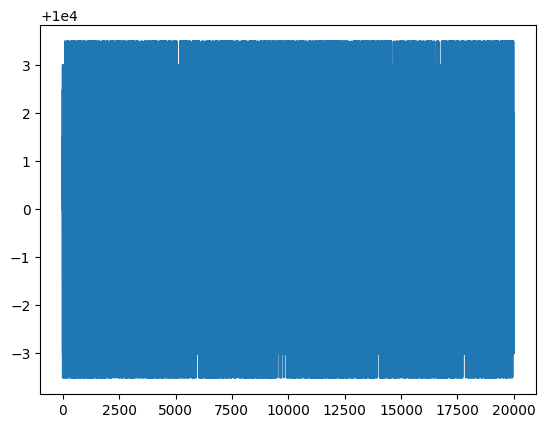

In [39]:
#plot the prices of amethysts over the 3 days
plt.plot(AMETHYSTS["mid_price"])
plt.show()

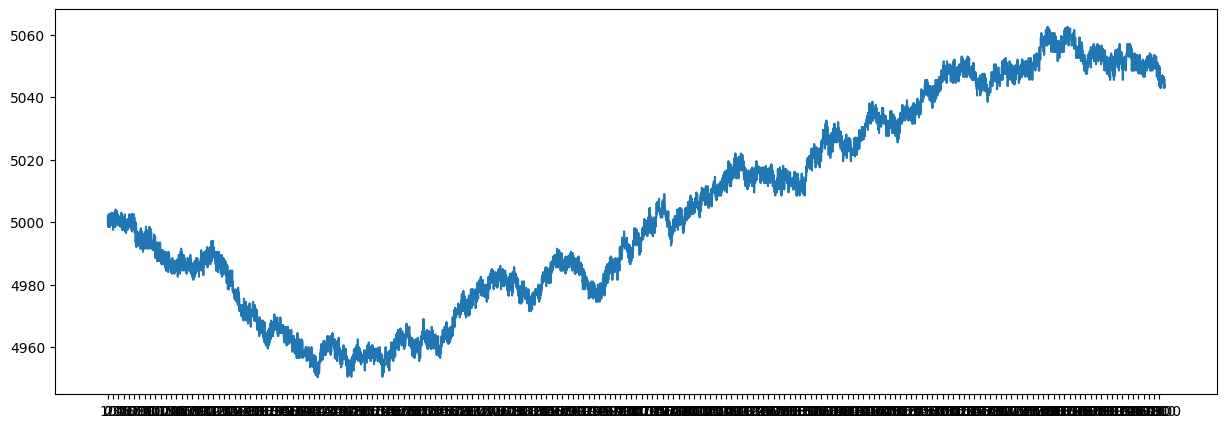

In [40]:
#plot the prices of starfruit for day -2, day -1 and day 0 on 3 separate graphs
plt.figure(figsize=(15, 5))
plt.plot(starfruit_day_2["mid_price"])
plt.xticks(np.arange(0, 20000, 100))
plt.show()

In [50]:
profit = 0
holding = 0
mean = 10000
for index, row in AMETHYSTS.iterrows():
    if row['bid_price_1'] > mean:
        profit += row['bid_price_1'] * row['bid_volume_1']
        holding -= row['bid_volume_1']
    if row['ask_price_1'] < mean:
        profit -= row['ask_price_1'] * row['ask_volume_1']
        holding += row['ask_volume_1']

print(profit)
print(holding * mean + profit)

-945278
24722


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_average
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,26,0.0,0.0,0.0,0.0,5000.0,0.0,NaN
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,0.0,0.0,0.0,0.0,5002.0,0.0,NaN
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,31,0.0,0.0,0.0,0.0,5000.0,0.0,NaN
7,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,27,0.0,0.0,0.0,0.0,4999.5,0.0,NaN
9,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,20,0.0,0.0,0.0,0.0,4998.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,28,0.0,0.0,0.0,0.0,5052.5,0.0,NaN
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,29,0.0,0.0,0.0,0.0,5051.0,0.0,NaN
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,2,5055.0,24.0,0.0,0.0,5053.5,0.0,NaN
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,1,5054.0,27.0,0.0,0.0,5049.5,0.0,NaN


In [74]:
STARFRUIT['10-day-SMA'] = STARFRUIT['mid_price'].rolling(window=10).mean()
STARFRUIT['100-day-SMA'] = STARFRUIT['mid_price'].rolling(window=100).mean()
STARFRUIT

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_average,25-day-SMA,100-day-SMA,10-day-SMA
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5000.0,0.0,5000.000000,NaN,NaN,NaN
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,0.0,0.0,0.0,0.0,5002.0,0.0,5000.156863,NaN,NaN,NaN
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5000.0,0.0,4999.516129,NaN,NaN,NaN
7,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,4999.5,0.0,4999.500000,NaN,NaN,NaN
9,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,0.0,0.0,0.0,0.0,4998.5,0.0,4998.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,0.0,0.0,0.0,0.0,5052.5,0.0,5052.500000,5052.36,5054.230,5052.50
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,0.0,0.0,0.0,0.0,5051.0,0.0,5050.261538,5052.14,5054.215,5052.25
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,5055.0,24.0,0.0,0.0,5053.5,0.0,5051.490566,5052.14,5054.225,5052.35
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,5054.0,27.0,0.0,0.0,5049.5,0.0,5050.527273,5052.00,5054.195,5051.95


In [77]:
STARFRUIT.replace(np.nan, 0, inplace=True)
STARFRUIT

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_average,25-day-SMA,100-day-SMA,10-day-SMA
1,-2,0,STARFRUIT,4997,26,0.0,0.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5000.0,0.0,5000.000000,0.00,0.000,0.00
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,0.0,0.0,0.0,0.0,5002.0,0.0,5000.156863,0.00,0.000,0.00
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,5000.0,0.0,4999.516129,0.00,0.000,0.00
7,-2,300,STARFRUIT,4996,27,0.0,0.0,0.0,0.0,5003,...,0.0,0.0,0.0,0.0,4999.5,0.0,4999.500000,0.00,0.000,0.00
9,-2,400,STARFRUIT,4995,20,0.0,0.0,0.0,0.0,5002,...,0.0,0.0,0.0,0.0,4998.5,0.0,4998.500000,0.00,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,0.0,0.0,0.0,0.0,5056,...,0.0,0.0,0.0,0.0,5052.5,0.0,5052.500000,5052.36,5054.230,5052.50
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,0.0,0.0,5054,...,0.0,0.0,0.0,0.0,5051.0,0.0,5050.261538,5052.14,5054.215,5052.25
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,0.0,0.0,5054,...,5055.0,24.0,0.0,0.0,5053.5,0.0,5051.490566,5052.14,5054.225,5052.35
19996,0,999800,STARFRUIT,5047,27,0.0,0.0,0.0,0.0,5052,...,5054.0,27.0,0.0,0.0,5049.5,0.0,5050.527273,5052.00,5054.195,5051.95


In [81]:
long_above_short = None
prev_difference = 0

profit = 0
holding = 0

for index, row in STARFRUIT.iterrows():
    if index < 100:
        continue
    if index == 100:
        if row['10-day-SMA'] > row['100-day-SMA']:
            long_above_short = False
        else:
            long_above_short = True
        prev_difference = row['100-day-SMA'] - row['10-day-SMA']
        continue
    

    
    if long_above_short and row['100-day-SMA'] - row['10-day-SMA'] < prev_difference:
        #buy
        profit -= row['ask_price_1'] * row['ask_volume_1']
        holding += row['ask_volume_1']
        prev_difference = row['100-day-SMA'] - row['10-day-SMA']
        if row['10-day-SMA'] >= row['100-day-SMA']:
            long_above_short = False
    elif long_above_short and row['100-day-SMA'] - row['10-day-SMA'] > prev_difference:
        #sell
        profit += row['bid_price_1'] * row['bid_volume_1']
        holding -= row['bid_volume_1']
        prev_difference = row['100-day-SMA'] - row['10-day-SMA']

    elif not long_above_short and row['100-day-SMA'] - row['10-day-SMA'] > prev_difference:
        #sell
        profit += row['bid_price_1'] * row['bid_volume_1']
        holding -= row['bid_volume_1']
        prev_difference = row['100-day-SMA'] - row['10-day-SMA']
        if row['10-day-SMA'] <= row['100-day-SMA']:
            long_above_short = True
    elif not long_above_short and row['100-day-SMA'] - row['10-day-SMA'] < prev_difference:
        #buy
        profit -= row['ask_price_1'] * row['ask_volume_1']
        holding += row['ask_volume_1']
        prev_difference = row['100-day-SMA'] - row['10-day-SMA']
    
        

-16842766
-2002509.9859999996
